# Imports

In [1]:
using DataFrames
using CSV
using MLJ
using Plots
using StatsBase

include("../../lib.jl")

ENV["LINES"]=30;

# Datasets

In [2]:
data = CSV.read("./data.csv")

,1,2,3,4,5,6,7,8,9,10,11
,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Int64
1,3.919,2.6909,0,0,0,0,0,31.4,2,0,0
2,4.17,2.1144,0,0,0,0,0,30.8,1,1,0
3,3.932,3.2512,0,0,0,0,0,26.7,2,4,0
4,3.0,2.7098,0,0,0,0,0,20.0,0,2,0
5,4.236,3.3944,0,0,0,0,0,29.4,2,4,0
6,4.236,3.4286,0,0,0,0,0,28.6,2,4,0
7,5.0,5.0476,1,0,0,0,0,11.1,0,3,0
8,4.525,3.8301,0,0,0,0,0,31.6,3,2,0
9,4.596,3.0777,0,0,0,0,2,44.4,2,0,0


In [3]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,1,4.78264,2.0,4.828,6.496,,,Float64
2,2,3.06951,0.8039,3.0463,9.1775,,,Float64
3,3,0.716588,0,0.0,12,,,Int64
4,4,0.042654,0,0.0,3,,,Int64
5,5,0.980095,0,0.0,36,,,Int64
6,6,0.290047,0,0.0,13,,,Int64
7,7,1.64645,0,1.0,18,,,Int64
8,8,37.0556,0.0,37.5,60.7,,,Float64
9,9,1.3763,0,1.0,24,,,Int64


Look at class labels to see if dataset is imbalanced

In [4]:
label_counts = countmap(data[:Class])

Dict{String,Int64} with 2 entries:
  "RB"  => 356
  "NRB" => 699

In [5]:
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

2-element Array{Float64,1}:
 0.33744075829383885
 0.6625592417061611

Get data ready for training

In [6]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ 1       │ Float64                         │ Continuous    │
│ 2       │ Float64                         │ Continuous    │
│ 3       │ Int64                           │ Count         │
│ 4       │ Int64                           │ Count         │
│ 5       │ Int64                           │ Count         │
│ 6       │ Int64                           │ Count         │
│ 7       │ Int64                           │ Count         │
│ 8       │ Float64                         │ Continuous    │
│ 9       │ Int64                           │ Count         │
│ 10      │ Int64                           │ Count         │
│ 11      │ Int64                           │ Count         │
│ 12      │ Float64                         │ Continuous    │
│ 13      │ Float64                         │ Continuous    │
│ 14    

In [7]:
y, X = unpack(data, ==(:Class), colname->true)

(CategoricalValue{String,UInt32}["RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB"  …  "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB"], 1055×41 DataFrame. Omitted printing of 33 columns
│ Row  │ 1       │ 2       │ 3     │ 4     │ 5     │ 6     │ 7     │ 8       │
│      │ Float64 │ Float64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Float64 │
├──────┼─────────┼─────────┼───────┼───────┼───────┼───────┼───────┼─────────┤
│ 1    │ 3.919   │ 2.6909  │ 0     │ 0     │ 0     │ 0     │ 0     │ 31.4    │
│ 2    │ 4.17    │ 2.1144  │ 0     │ 0     │ 0     │ 0     │ 0     │ 30.8    │
│ 3    │ 3.932   │ 3.2512  │ 0     │ 0     │ 0     │ 0     │ 0     │ 26.7    │
│ 4    │ 3.0     │ 2.7098  │ 0     │ 0     │ 0     │ 0     │ 0     │ 20.0    │
│ 5    │ 4.236   │ 3.3944  │ 0     │ 0     │ 0     │ 0     │ 0     │ 29.4    │
│ 6    │ 4.236   │ 3.4286  │ 0     │ 0     │ 0     │ 0     │ 0     │ 28.6    │
│ 7    │ 5.0     │ 5.0476  │ 1     │ 0     │ 0     │ 0     │ 0     │ 11.

Partition train and test data accoring to class labels

In [8]:
# data to use when trying to fit a single validation set
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=145) # gives 70:30 split

([531, 637, 400, 786, 676, 791, 963, 561, 277, 584  …  486, 403, 1052, 784, 872, 147, 925, 930, 445, 974], [286, 263, 741, 694, 950, 552, 681, 701, 645, 91  …  975, 1049, 992, 957, 891, 705, 130, 471, 906, 809])

In [9]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

2-element Array{Float64,1}:
 0.34688346883468835
 0.6531165311653117

In [10]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

2-element Array{Float64,1}:
 0.31545741324921134
 0.6845425867507886

In [11]:
standardizer = Standardizer()
stand = machine(standardizer, X[train,:]) #only want to standardize on training distribution
fit!(stand)
X_stand = MLJ.transform(stand, X);

┌ Info: Training Machine{Standardizer} @064.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


# Five Learning Algorithms

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors


##### Testing
* Implement the algorithms
* Design two *interesting* classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples.

In [33]:
models("SVM")

12-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = EpsilonSVR, package_name = LIBSVM, ... )
 (name = LinearSVC, package_name = LIBSVM, ... )
 (name = NuSVC, package_name = LIBSVM, ... )
 (name = NuSVR, package_name = LIBSVM, ... )
 (name = OneClassSVM, package_name = LIBSVM, ... )
 (name = SVC, package_name = LIBSVM, ... )
 (name = SVMClassifier, package_name = ScikitLearn, ... )
 (name = SVMLinearClassifier, package_name = ScikitLearn, ... )
 (name = SVMLinearRegressor, package_name = ScikitLearn, ... )
 (name = SVMNuClassifier, package_name = ScikitLearn, ... )
 (name = SVMNuRegressor, package_name = ScikitLearn, ... )
 (name = SVMRegressor, package_n

In [34]:
@load SVMLinearClassifier

SVMLinearClassifier(
    penalty = "l2",
    loss = "squared_hinge",
    dual = true,
    tol = 0.0001,
    C = 1.0,
    multi_class = "ovr",
    fit_intercept = true,
    intercept_scaling = 1.0,
    random_state = nothing,
    max_iter = 1000) @164

In [13]:
@load SVMClassifier

SVMClassifier(
    C = 1.0,
    kernel = "rbf",
    degree = 3,
    gamma = "auto",
    coef0 = 0.0,
    shrinking = true,
    tol = 0.001,
    cache_size = 200,
    max_iter = -1,
    decision_function_shape = "ovr",
    random_state = nothing) @517

## Support Vector Machines
* This should be done in such a way that you can swap out kernel functions. I'd like to see at least two.

In [35]:
svm_model = SVMLinearClassifier()
svm_mach = machine(svm_model, X_stand, y)
fit!(svm_mach, rows=train, verbosity=2)
svm_acc = evaluate!(svm_mach, resampling=CV(shuffle=true), measure=[accuracy], 
                        verbosity=1)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMLinearClassifier @316`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{SVMLinearClassifier} @310.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure │ _.measurement │ _.per_fold                                 │
├───────────┼───────────────┼────────────────────────────────────────────┤
│ accuracy  │ 0.863         │ [0.864, 0.875, 0.835, 0.864, 0.864, 0.874] │
└───────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [15]:
svm_model = SVMClassifier(kernel="sigmoid")
svm_mach = machine(svm_model, X_stand, y)
fit!(svm_mach, rows=train, verbosity=2)
svm_acc = evaluate!(svm_mach, resampling=CV(shuffle=true), measure=[accuracy], 
                        verbosity=1)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @632`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{SVMClassifier} @139.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure │ _.measurement │ _.per_fold                                 │
├───────────┼───────────────┼────────────────────────────────────────────┤
│ accuracy  │ 0.634         │ [0.597, 0.568, 0.642, 0.636, 0.591, 0.771] │
└───────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [16]:
svm_model = SVMClassifier(kernel="rbf")
svm_mach = machine(svm_model, X_stand, y)
fit!(svm_mach, rows=train, verbosity=2)
svm_acc = evaluate!(svm_mach, resampling=CV(shuffle=true), measure=[accuracy], 
                        verbosity=1)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @054`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{SVMClassifier} @521.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure │ _.measurement │ _.per_fold                                 │
├───────────┼───────────────┼────────────────────────────────────────────┤
│ accuracy  │ 0.868         │ [0.847, 0.835, 0.886, 0.858, 0.898, 0.886] │
└───────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


Poly Degree 2 took a long wall clock time

In [17]:
svm_model = SVMClassifier(kernel="poly", degree=2)
svm_mach = machine(svm_model, X_stand, y)
fit!(svm_mach, rows=train, verbosity=2)
svm_acc = evaluate!(svm_mach, resampling=CV(shuffle=true), measure=[accuracy], 
                        verbosity=1)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @713`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{SVMClassifier} @636.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure │ _.measurement │ _.per_fold                                 │
├───────────┼───────────────┼────────────────────────────────────────────┤
│ accuracy  │ 0.871         │ [0.886, 0.886, 0.847, 0.892, 0.864, 0.851] │
└───────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


Can't use crossentropy because it is a probabilistic concept, and SVM doesn't do probabilities?

## GridSearch / RandomSearch

Use `linear` and `rbf`: 
* `linear` which has high bias
* `rbf` which has high variance

### Second look at `linear`

In [181]:
svm_linear_model = SVMClassifier(kernel="linear", cache_size=2000)
svm_linear_mach = machine(svm_linear_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @907`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{SVMClassifier} @061 trained 0 times.
  args: 
    1:	Source @112 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @444 ⏎ `AbstractArray{Multiclass{2},1}`


In [182]:
r1 = range(svm_linear_model, :C, lower=5*10^-2, upper=10^2, scale=:log10)
curve = learning_curve(svm_linear_mach, 
                        range=r1,
                        resampling=CV(), 
                        measure=accuracy, 
                        acceleration=CPUThreads(),
                        resolution=500)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…}} @344.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 500 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{CV,…} @818`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @165`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} wher

Evaluating over 500 metamodels:   3%[>                        ]  ETA: 0:00:59┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @288`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:   3%[>                        ]  ETA: 0:00:59┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @366`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:   4%[>                        ]  ETA: 0:00:59┌ Warning

Evaluating over 500 metamodels:   7%[=>                       ]  ETA: 0:00:58┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @301`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:   7%[=>                       ]  ETA: 0:00:58┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @643`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:   7%[=>                       ]  ETA: 0:00:58┌ Warning

Evaluating over 500 metamodels:  10%[==>                      ]  ETA: 0:00:56┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @039`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  10%[==>                      ]  ETA: 0:00:56┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @036`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  10%[==>                      ]  ETA: 0:00:56┌ Warning

Evaluating over 500 metamodels:  13%[===>                     ]  ETA: 0:00:55┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @672`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  14%[===>                     ]  ETA: 0:00:55┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @233`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  14%[===>                     ]  ETA: 0:00:55┌ Warning

Evaluating over 500 metamodels:  17%[====>                    ]  ETA: 0:00:53┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @373`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  17%[====>                    ]  ETA: 0:00:53┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @107`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  17%[====>                    ]  ETA: 0:00:53┌ Warning

Evaluating over 500 metamodels:  20%[=====>                   ]  ETA: 0:00:52┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @297`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  20%[=====>                   ]  ETA: 0:00:52┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @745`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  21%[=====>                   ]  ETA: 0:00:51┌ Warning

Evaluating over 500 metamodels:  24%[=====>                   ]  ETA: 0:00:51┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @933`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  24%[=====>                   ]  ETA: 0:00:50┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @528`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  24%[======>                  ]  ETA: 0:00:50┌ Warning

Evaluating over 500 metamodels:  27%[======>                  ]  ETA: 0:00:50┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @868`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  27%[======>                  ]  ETA: 0:00:50┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @178`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  27%[======>                  ]  ETA: 0:00:50┌ Warning

Evaluating over 500 metamodels:  30%[=======>                 ]  ETA: 0:00:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @212`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  31%[=======>                 ]  ETA: 0:00:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @523`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  31%[=======>                 ]  ETA: 0:00:49┌ Warning

Evaluating over 500 metamodels:  34%[========>                ]  ETA: 0:00:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @452`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  34%[========>                ]  ETA: 0:00:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @046`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  34%[========>                ]  ETA: 0:00:49┌ Warning

Evaluating over 500 metamodels:  37%[=========>               ]  ETA: 0:00:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @869`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  37%[=========>               ]  ETA: 0:00:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @080`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  38%[=========>               ]  ETA: 0:00:49┌ Warning

Evaluating over 500 metamodels:  41%[==========>              ]  ETA: 0:00:48┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @866`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  41%[==========>              ]  ETA: 0:00:48┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @336`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  41%[==========>              ]  ETA: 0:00:48┌ Warning

Evaluating over 500 metamodels:  44%[===========>             ]  ETA: 0:00:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @558`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  44%[===========>             ]  ETA: 0:00:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @437`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  44%[===========>             ]  ETA: 0:00:49┌ Warning

Evaluating over 500 metamodels:  47%[===========>             ]  ETA: 0:00:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @814`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  48%[===========>             ]  ETA: 0:00:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @540`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  48%[===========>             ]  ETA: 0:00:49┌ Warning

Evaluating over 500 metamodels:  51%[============>            ]  ETA: 0:00:50┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @620`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  51%[============>            ]  ETA: 0:00:51┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @818`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  51%[============>            ]  ETA: 0:00:51┌ Warning

Evaluating over 500 metamodels:  54%[=============>           ]  ETA: 0:00:53┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @015`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  54%[=============>           ]  ETA: 0:00:53┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @898`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  55%[=============>           ]  ETA: 0:00:53┌ Warning

Evaluating over 500 metamodels:  58%[==============>          ]  ETA: 0:00:56┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @005`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  58%[==============>          ]  ETA: 0:00:56┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @353`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  58%[==============>          ]  ETA: 0:00:56┌ Warning

Evaluating over 500 metamodels:  61%[===============>         ]  ETA: 0:00:57┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @235`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  61%[===============>         ]  ETA: 0:00:57┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @626`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  61%[===============>         ]  ETA: 0:00:57┌ Warning

Evaluating over 500 metamodels:  64%[================>        ]  ETA: 0:00:59┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @942`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  65%[================>        ]  ETA: 0:01:00┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @358`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  65%[================>        ]  ETA: 0:01:00┌ Warning

Evaluating over 500 metamodels:  68%[================>        ]  ETA: 0:01:01┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @366`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  68%[=================>       ]  ETA: 0:01:01┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @657`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  68%[=================>       ]  ETA: 0:01:02┌ Warning

Evaluating over 500 metamodels:  71%[=================>       ]  ETA: 0:01:03┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @501`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  71%[=================>       ]  ETA: 0:01:03┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @775`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  72%[=================>       ]  ETA: 0:01:03┌ Warning

Evaluating over 500 metamodels:  75%[==================>      ]  ETA: 0:01:05┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @839`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  75%[==================>      ]  ETA: 0:01:05┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @532`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  75%[==================>      ]  ETA: 0:01:05┌ Warning

Evaluating over 500 metamodels:  78%[===================>     ]  ETA: 0:01:09┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @485`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  78%[===================>     ]  ETA: 0:01:09┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @116`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  78%[===================>     ]  ETA: 0:01:09┌ Warning

Evaluating over 500 metamodels:  81%[====================>    ]  ETA: 0:01:11┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @134`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  82%[====================>    ]  ETA: 0:01:11┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @294`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  82%[====================>    ]  ETA: 0:01:11┌ Warning

Evaluating over 500 metamodels:  85%[=====================>   ]  ETA: 0:01:10┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @724`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  85%[=====================>   ]  ETA: 0:01:10┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @165`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  85%[=====================>   ]  ETA: 0:01:10┌ Warning

Evaluating over 500 metamodels:  88%[======================>  ]  ETA: 0:01:07┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @174`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  88%[======================>  ]  ETA: 0:01:06┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @336`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  89%[======================>  ]  ETA: 0:01:06┌ Warning

Evaluating over 500 metamodels:  92%[======================>  ]  ETA: 0:00:58┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @653`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  92%[======================>  ]  ETA: 0:00:58┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @700`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  92%[=======================> ]  ETA: 0:00:57┌ Warning

Evaluating over 500 metamodels:  95%[=======================> ]  ETA: 0:00:44┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @001`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  95%[=======================> ]  ETA: 0:00:43┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @108`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  95%[=======================> ]  ETA: 0:00:42┌ Warning

Evaluating over 500 metamodels:  98%[========================>]  ETA: 0:00:18┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @189`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  99%[========================>]  ETA: 0:00:16┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @353`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  99%[========================>]  ETA: 0:00:14┌ Warning

(parameter_name = "C",
 parameter_scale = :log10,
 parameter_values = [0.05000000000000002, 0.05076744358806928, 0.05154666656935589, 0.052337849744255815, 0.05314117668824702, 0.05395683379448404, 0.05478501031704592, 0.05562589841484842, 0.056479693196229745, 0.057346592764221056  …  87.18913816828429, 88.52739306901499, 89.886188672601, 91.26584025565643, 92.66666793393551, 94.08899673660837, 95.5331566816759, 96.99948285254327, 98.48831547576759, 100.0],
 measurements = [0.8304112554112555, 0.8304112554112555, 0.8304112554112555, 0.8294642857142858, 0.8304166666666667, 0.8313636363636364, 0.8313636363636364, 0.8323106060606061, 0.8304112554112555, 0.8285119047619047  …  0.839853896103896, 0.839853896103896, 0.839853896103896, 0.8389069264069263, 0.8389069264069263, 0.8389069264069263, 0.8389069264069263, 0.8389069264069263, 0.8389069264069263, 0.8389069264069263],)

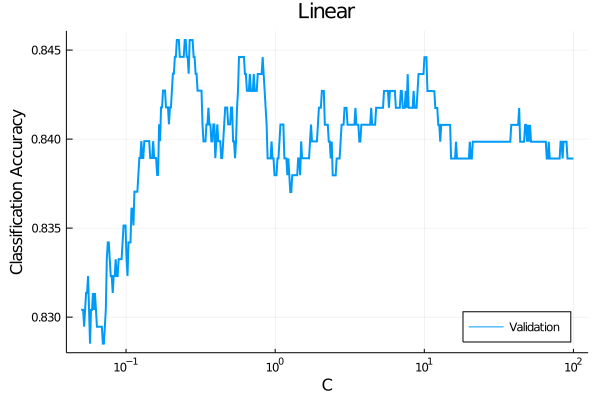

In [183]:
plot(curve.parameter_values,
     curve.measurements,
     xscale=curve.parameter_scale,
     xlab=curve.parameter_name,
     ylab="Classification Accuracy",
     label="Validation", lw=2,
     title="Linear", 
     legend=:bottomright)

In [184]:
fn = "Figures/SVM_Linear_MCC"
png(replace(fn,'.' => ','))

In [185]:
r1 = range(svm_linear_model, :C, lower=10^-1, upper=10^0, scale=:linear)
curve = learning_curve(svm_linear_mach, 
                        range=r1,
                        resampling=CV(), 
                        measure=accuracy, 
                        acceleration=CPUThreads(),
                        resolution=500)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…}} @712.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 500 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{CV,…} @043`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @940`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} wher

Evaluating over 500 metamodels:   3%[>                        ]  ETA: 0:00:59┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @026`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:   3%[>                        ]  ETA: 0:00:59┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @225`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:   4%[>                        ]  ETA: 0:00:59┌ Warning

Evaluating over 500 metamodels:   7%[=>                       ]  ETA: 0:00:58┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @292`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:   7%[=>                       ]  ETA: 0:00:58┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @461`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:   7%[=>                       ]  ETA: 0:00:58┌ Warning

Evaluating over 500 metamodels:  10%[==>                      ]  ETA: 0:00:57┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @845`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  10%[==>                      ]  ETA: 0:00:57┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @274`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  10%[==>                      ]  ETA: 0:00:57┌ Warning

Evaluating over 500 metamodels:  13%[===>                     ]  ETA: 0:00:56┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @590`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  14%[===>                     ]  ETA: 0:00:56┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @112`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  14%[===>                     ]  ETA: 0:00:56┌ Warning

Evaluating over 500 metamodels:  17%[====>                    ]  ETA: 0:00:55┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @375`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  17%[====>                    ]  ETA: 0:00:54┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @518`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  17%[====>                    ]  ETA: 0:00:54┌ Warning

Evaluating over 500 metamodels:  20%[=====>                   ]  ETA: 0:00:53┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @057`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  20%[=====>                   ]  ETA: 0:00:53┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @661`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  21%[=====>                   ]  ETA: 0:00:53┌ Warning

Evaluating over 500 metamodels:  24%[=====>                   ]  ETA: 0:00:52┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @107`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  24%[=====>                   ]  ETA: 0:00:52┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @158`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  24%[======>                  ]  ETA: 0:00:52┌ Warning

Evaluating over 500 metamodels:  27%[======>                  ]  ETA: 0:00:51┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @961`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  27%[======>                  ]  ETA: 0:00:51┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @851`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  27%[======>                  ]  ETA: 0:00:51┌ Warning

Evaluating over 500 metamodels:  30%[=======>                 ]  ETA: 0:00:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @818`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  31%[=======>                 ]  ETA: 0:00:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @743`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  31%[=======>                 ]  ETA: 0:00:49┌ Warning

Evaluating over 500 metamodels:  34%[========>                ]  ETA: 0:00:48┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @229`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  34%[========>                ]  ETA: 0:00:48┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @102`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  34%[========>                ]  ETA: 0:00:48┌ Warning

Evaluating over 500 metamodels:  37%[=========>               ]  ETA: 0:00:46┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @562`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  37%[=========>               ]  ETA: 0:00:46┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @534`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  38%[=========>               ]  ETA: 0:00:46┌ Warning

Evaluating over 500 metamodels:  41%[==========>              ]  ETA: 0:00:44┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @719`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  41%[==========>              ]  ETA: 0:00:44┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @747`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  41%[==========>              ]  ETA: 0:00:44┌ Warning

Evaluating over 500 metamodels:  44%[===========>             ]  ETA: 0:00:42┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @242`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  44%[===========>             ]  ETA: 0:00:42┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @022`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  44%[===========>             ]  ETA: 0:00:42┌ Warning

Evaluating over 500 metamodels:  47%[===========>             ]  ETA: 0:00:40┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @553`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  48%[===========>             ]  ETA: 0:00:40┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @648`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  48%[===========>             ]  ETA: 0:00:40┌ Warning

Evaluating over 500 metamodels:  51%[============>            ]  ETA: 0:00:38┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @736`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  51%[============>            ]  ETA: 0:00:38┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @229`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  51%[============>            ]  ETA: 0:00:38┌ Warning

Evaluating over 500 metamodels:  54%[=============>           ]  ETA: 0:00:36┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @868`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  54%[=============>           ]  ETA: 0:00:36┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @121`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  55%[=============>           ]  ETA: 0:00:36┌ Warning

Evaluating over 500 metamodels:  58%[==============>          ]  ETA: 0:00:34┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @030`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  58%[==============>          ]  ETA: 0:00:34┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @198`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  58%[==============>          ]  ETA: 0:00:33┌ Warning

Evaluating over 500 metamodels:  61%[===============>         ]  ETA: 0:00:31┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @680`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  61%[===============>         ]  ETA: 0:00:31┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @404`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  61%[===============>         ]  ETA: 0:00:31┌ Warning

Evaluating over 500 metamodels:  64%[================>        ]  ETA: 0:00:29┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @597`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  65%[================>        ]  ETA: 0:00:29┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @340`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  65%[================>        ]  ETA: 0:00:29┌ Warning

Evaluating over 500 metamodels:  68%[================>        ]  ETA: 0:00:27┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @125`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  68%[=================>       ]  ETA: 0:00:26┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @749`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  68%[=================>       ]  ETA: 0:00:26┌ Warning

Evaluating over 500 metamodels:  71%[=================>       ]  ETA: 0:00:24┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @814`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  71%[=================>       ]  ETA: 0:00:24┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @089`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  72%[=================>       ]  ETA: 0:00:24┌ Warning

Evaluating over 500 metamodels:  75%[==================>      ]  ETA: 0:00:22┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @702`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  75%[==================>      ]  ETA: 0:00:21┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @894`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  75%[==================>      ]  ETA: 0:00:21┌ Warning

Evaluating over 500 metamodels:  78%[===================>     ]  ETA: 0:00:19┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @094`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  78%[===================>     ]  ETA: 0:00:19┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @369`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  78%[===================>     ]  ETA: 0:00:19┌ Warning

Evaluating over 500 metamodels:  81%[====================>    ]  ETA: 0:00:16┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @247`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  82%[====================>    ]  ETA: 0:00:16┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @053`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  82%[====================>    ]  ETA: 0:00:16┌ Warning

Evaluating over 500 metamodels:  85%[=====================>   ]  ETA: 0:00:13┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @901`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  85%[=====================>   ]  ETA: 0:00:13┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @009`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  85%[=====================>   ]  ETA: 0:00:13┌ Warning

Evaluating over 500 metamodels:  88%[======================>  ]  ETA: 0:00:10┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @871`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  88%[======================>  ]  ETA: 0:00:10┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @829`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  89%[======================>  ]  ETA: 0:00:10┌ Warning

Evaluating over 500 metamodels:  92%[======================>  ]  ETA: 0:00:08┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @239`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  92%[======================>  ]  ETA: 0:00:07┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @297`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  92%[=======================> ]  ETA: 0:00:07┌ Warning

Evaluating over 500 metamodels:  95%[=======================> ]  ETA: 0:00:05┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @555`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  95%[=======================> ]  ETA: 0:00:04┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @387`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  95%[=======================> ]  ETA: 0:00:04┌ Warning

Evaluating over 500 metamodels:  98%[========================>]  ETA: 0:00:01┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @308`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  99%[========================>]  ETA: 0:00:01┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @220`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 500 metamodels:  99%[========================>]  ETA: 0:00:01┌ Warning

(parameter_name = "C",
 parameter_scale = :linear,
 parameter_values = [0.1, 0.10180360721442885, 0.10360721442885772, 0.10541082164328658, 0.10721442885771543, 0.10901803607214429, 0.11082164328657315, 0.112625250501002, 0.11442885771543086, 0.11623246492985972  …  0.9837675350701403, 0.9855711422845691, 0.987374749498998, 0.9891783567134268, 0.9909819639278558, 0.9927855711422846, 0.9945891783567135, 0.9963927855711423, 0.9981963927855712, 1.0],
 measurements = [0.8351461038961038, 0.8332521645021645, 0.8341991341991343, 0.8341991341991343, 0.8341991341991343, 0.8360930735930737, 0.8360930735930737, 0.835146103896104, 0.8370454545454545, 0.8370454545454545  …  0.838917748917749, 0.838917748917749, 0.8379707792207792, 0.8398647186147187, 0.838917748917749, 0.838917748917749, 0.8379707792207792, 0.8379707792207792, 0.8379707792207792, 0.8379707792207792],)

┌ Warning: scale linear is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots /home/andrew/.julia/packages/Plots/M1wcx/src/args.jl:1211


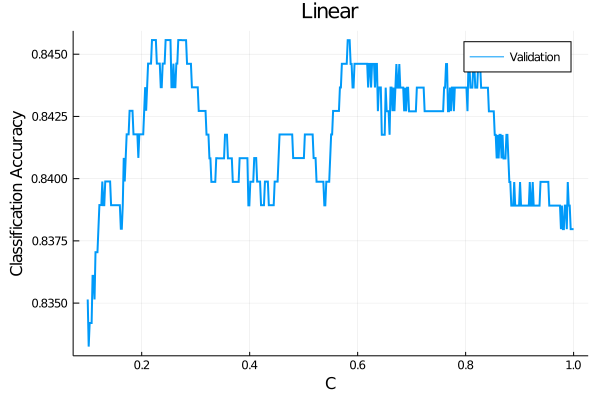

In [186]:
plot(curve.parameter_values,
     curve.measurements,
     xscale=curve.parameter_scale,
     xlab=curve.parameter_name,
     ylab="Classification Accuracy",
     label="Validation", lw=2,
     title="Linear")

In [187]:
a = round(maximum(curve.measurements), digits=5)

0.84557

In [188]:
best_C = curve.parameter_values[argmax(curve.measurements)]

0.2190380761523046

##### More fitting

In [189]:
best_linear_model = SVMClassifier(kernel="linear", C = best_C)
svm_mach = machine(best_linear_model, X_stand, y)
lf = fit!(svm_mach, rows=train, verbosity=2)
svm_acc = evaluate!(svm_mach, resampling=CV(shuffle=true), measure=[accuracy], 
                        verbosity=1)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{SVMClassifier} @508.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────┬───────────────┬───────────────────────────────────────────┐
│ _.measure │ _.measurement │ _.per_fold                                │
├───────────┼───────────────┼───────────────────────────────────────────┤
│ accuracy  │ 0.874         │ [0.892, 0.903, 0.864, 0.903, 0.841, 0.84] │
└───────────┴───────────────┴───────────────────────────────────────────┘
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


##### Learning Curves

In [190]:
data_schedule, training_losses, valid_losses = learn_curve(best_linear_model, X_stand[train,:], y[train])

(d, train_metric, valid_metric) = (10, 1.0, 0.6959459459459459)
(d, train_metric, valid_metric) = (15, 1.0, 0.7432432432432432)
(d, train_metric, valid_metric) = (20, 1.0, 0.75)
(d, train_metric, valid_metric) = (25, 1.0, 0.777027027027027)
(d, train_metric, valid_metric) = (30, 1.0, 0.7972972972972973)
(d, train_metric, valid_metric) = (35, 1.0, 0.7972972972972973)
(d, train_metric, valid_metric) = (40, 1.0, 0.777027027027027)
(d, train_metric, valid_metric) = (45, 1.0, 0.777027027027027)
(d, train_metric, valid_metric) = (50, 1.0, 0.7635135135135135)
(d, train_metric, valid_metric) = (55, 1.0, 0.75)
(d, train_metric, valid_metric) = (60, 0.9666666666666667, 0.7905405405405406)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (65, 0.9846153846153847, 0.7972972972972973)
(d, train_metric, valid_metric) = (70, 0.9714285714285714, 0.8040540540540541)
(d, train_metric, valid_metric) = (75, 0.9333333333333333, 0.8108108108108107)
(d, train_metric, valid_metric) = (80, 0.9, 0.8040540540540541)
(d, train_metric, valid_metric) = (85, 0.9058823529411765, 0.7972972972972973)
(d, train_metric, valid_metric) = (90, 0.9333333333333333, 0.8310810810810811)
(d, train_metric, valid_metric) = (95, 0.8947368421052632, 0.8175675675675675)
(d, train_metric, valid_metric) = (100, 0.89, 0.7905405405405406)
(d, train_metric, valid_metric) = (105, 0.8952380952380953, 0.7905405405405406)
(d, train_metric, valid_metric) = (110, 0.8818181818181818, 0.7972972972972973)
(d, train_metric, valid_metric) = (115, 0.8956521739130435, 0.8243243243243243)
(d, train_metric, valid_metric) = (120, 0.8916666666666666, 0.8378378378378378)
(d, train_metric, valid_metric) = (125, 0.888, 0.8378378378378378)
(d, train

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (215, 0.8790697674418605, 0.8310810810810811)
(d, train_metric, valid_metric) = (220, 0.8772727272727273, 0.8378378378378378)
(d, train_metric, valid_metric) = (225, 0.88, 0.8445945945945946)
(d, train_metric, valid_metric) = (230, 0.8782608695652174, 0.8378378378378378)
(d, train_metric, valid_metric) = (235, 0.8936170212765957, 0.8513513513513513)
(d, train_metric, valid_metric) = (240, 0.8708333333333333, 0.8378378378378378)
(d, train_metric, valid_metric) = (245, 0.8693877551020408, 0.8378378378378378)
(d, train_metric, valid_metric) = (250, 0.876, 0.8378378378378378)
(d, train_metric, valid_metric) = (255, 0.8784313725490196, 0.8378378378378378)
(d, train_metric, valid_metric) = (260, 0.8807692307692307, 0.8445945945945946)
(d, train_metric, valid_metric) = (265, 0.8830188679245283, 0.8445945945945946)
(d, train_metric, valid_metric) = (270, 0.8851851851851852, 0.8445945945945946)
(d, train_metric, valid_metric) = (275, 0.88, 0.8445945945945946)
(

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (310, 0.8935483870967742, 0.8851351351351351)
(d, train_metric, valid_metric) = (315, 0.8857142857142857, 0.8783783783783784)
(d, train_metric, valid_metric) = (320, 0.890625, 0.8851351351351351)
(d, train_metric, valid_metric) = (325, 0.8830769230769231, 0.8783783783783784)
(d, train_metric, valid_metric) = (330, 0.8848484848484849, 0.8783783783783784)
(d, train_metric, valid_metric) = (335, 0.8865671641791044, 0.8918918918918919)
(d, train_metric, valid_metric) = (340, 0.8911764705882352, 0.8851351351351351)
(d, train_metric, valid_metric) = (345, 0.8927536231884058, 0.8851351351351351)
(d, train_metric, valid_metric) = (350, 0.8857142857142857, 0.8783783783783784)
(d, train_metric, valid_metric) = (355, 0.8929577464788733, 0.8783783783783784)
(d, train_metric, valid_metric) = (360, 0.8861111111111111, 0.8851351351351351)
(d, train_metric, valid_metric) = (365, 0.8821917808219178, 0.8851351351351351)
(d, train_metric, valid_metric) = (370, 0.88378378

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (375, 0.8826666666666667, 0.8851351351351351)
(d, train_metric, valid_metric) = (380, 0.8868421052631579, 0.8648648648648649)
(d, train_metric, valid_metric) = (385, 0.8857142857142857, 0.8581081081081081)
(d, train_metric, valid_metric) = (390, 0.882051282051282, 0.8716216216216216)
(d, train_metric, valid_metric) = (395, 0.8835443037974684, 0.8648648648648649)
(d, train_metric, valid_metric) = (400, 0.8875, 0.8581081081081081)
(d, train_metric, valid_metric) = (405, 0.8839506172839506, 0.8648648648648649)
(d, train_metric, valid_metric) = (410, 0.8853658536585366, 0.8648648648648649)
(d, train_metric, valid_metric) = (415, 0.8843373493975903, 0.8648648648648649)
(d, train_metric, valid_metric) = (420, 0.8928571428571429, 0.8648648648648649)
(d, train_metric, valid_metric) = (425, 0.88, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (430, 0.8767441860465116, 0.8648648648648649)
(d, train_metric, valid_metric) = (435, 0.8804597701149426, 0.8716216216216216)
(d, train_metric, valid_metric) = (440, 0.884090909090909, 0.8716216216216216)
(d, train_metric, valid_metric) = (445, 0.8853932584269663, 0.8716216216216216)
(d, train_metric, valid_metric) = (450, 0.8888888888888888, 0.8783783783783784)
(d, train_metric, valid_metric) = (455, 0.8857142857142857, 0.8851351351351351)
(d, train_metric, valid_metric) = (460, 0.8826086956521739, 0.8716216216216216)
(d, train_metric, valid_metric) = (465, 0.8817204301075269, 0.8716216216216216)
(d, train_metric, valid_metric) = (470, 0.8936170212765957, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (475, 0.8821052631578947, 0.8918918918918919)
(d, train_metric, valid_metric) = (480, 0.8833333333333333, 0.8918918918918919)
(d, train_metric, valid_metric) = (485, 0.8865979381443299, 0.8851351351351351)
(d, train_metric, valid_metric) = (490, 0.8795918367346939, 0.8716216216216216)
(d, train_metric, valid_metric) = (495, 0.8848484848484849, 0.8716216216216216)
(d, train_metric, valid_metric) = (500, 0.884, 0.8851351351351351)
(d, train_metric, valid_metric) = (505, 0.8811881188118812, 0.8851351351351351)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (510, 0.8764705882352941, 0.8716216216216216)
(d, train_metric, valid_metric) = (515, 0.8815533980582524, 0.8783783783783784)
(d, train_metric, valid_metric) = (520, 0.8730769230769231, 0.8851351351351351)
(d, train_metric, valid_metric) = (525, 0.878095238095238, 0.8851351351351351)
(d, train_metric, valid_metric) = (530, 0.8773584905660378, 0.8851351351351351)
(d, train_metric, valid_metric) = (535, 0.8728971962616823, 0.8783783783783784)
(d, train_metric, valid_metric) = (540, 0.8740740740740741, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (545, 0.8770642201834862, 0.8783783783783784)
(d, train_metric, valid_metric) = (550, 0.8763636363636363, 0.8783783783783784)
(d, train_metric, valid_metric) = (555, 0.8846846846846846, 0.8783783783783784)
(d, train_metric, valid_metric) = (560, 0.8857142857142857, 0.8783783783783784)
(d, train_metric, valid_metric) = (565, 0.8849557522123894, 0.8783783783783784)
(d, train_metric, valid_metric) = (570, 0.8824561403508772, 0.8783783783783784)
(d, train_metric, valid_metric) = (575, 0.8817391304347826, 0.8851351351351351)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (580, 0.8810344827586207, 0.8716216216216216)
(d, train_metric, valid_metric) = (585, 0.8837606837606837, 0.8783783783783784)
(d, train_metric, valid_metric) = (590, 0.8779661016949153, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @488`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(10:5:590, Any[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.8770642201834862, 0.8763636363636363, 0.8846846846846846, 0.8857142857142857, 0.8849557522123894, 0.8824561403508772, 0.8817391304347826, 0.8810344827586207, 0.8837606837606837, 0.8779661016949153], Any[0.6959459459459459, 0.7432432432432432, 0.75, 0.777027027027027, 0.7972972972972973, 0.7972972972972973, 0.777027027027027, 0.777027027027027, 0.7635135135135135, 0.75  …  0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8851351351351351, 0.8716216216216216, 0.8783783783783784, 0.8783783783783784])

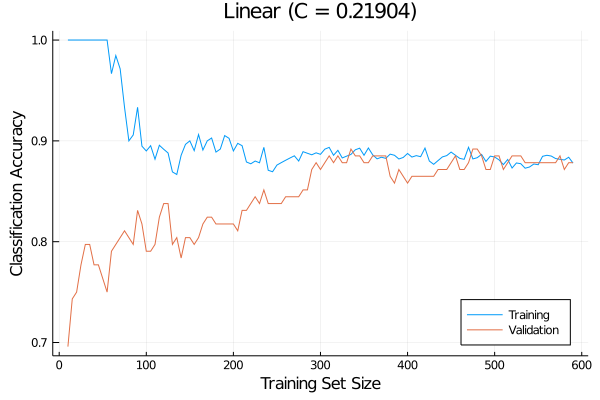

In [191]:
plot(data_schedule, training_losses, label="Training", legend=:bottomright)
plot!(data_schedule, valid_losses, label="Validation")
ylabel!("Classification Accuracy")
xlabel!("Training Set Size")
title!("Linear (C = $(round(best_C,digits=5)))")

In [192]:
fn = "Figures/SVM_Linear_LC"
png(replace(fn,'.' => ','))

#### Final Results

Linear SVM

In [89]:
Final_SVM = machine(best_linear_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @989`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{SVMClassifier} @817 trained 0 times.
  args: 
    1:	Source @365 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @939 ⏎ `AbstractArray{Multiclass{2},1}`


In [90]:
fit!(Final_SVM, rows=train, verbosity=2)

┌ Info: Training Machine{SVMClassifier} @817.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{SVMClassifier} @817 trained 1 time.
  args: 
    1:	Source @365 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @939 ⏎ `AbstractArray{Multiclass{2},1}`


In [92]:
ŷ = MLJ.predict(Final_SVM, X_stand[test,:]);

In [93]:
accuracy(ŷ, y[test])

0.8801261829652997

In [99]:
c1 = confusion_matrix(ŷ, y[test])

┌ Warning: The classes are un-ordered,
│ using: negative='NRB' and positive='RB'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/measures/confusion_matrix.jl:83


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │     NRB     │     RB      │
├─────────────┼─────────────┼─────────────┤
│     NRB     │     198     │     19      │
├─────────────┼─────────────┼─────────────┤
│     RB      │     19      │     81      │
└─────────────┴─────────────┴─────────────┘


In [100]:
precision(c1)

0.81

In [101]:
recall(c1)

0.81

In [102]:
19/(19+198)

0.08755760368663594

In [103]:
19/(19+81)

0.19

### Second look at `rbf`

In [135]:
r1 = range(Float64, :C, lower=10^-1, upper=10^4, scale=:log10)
r2 = range(Float64, :gamma, lower=5*10^-5, upper=10^-1, scale=:log10)

MLJBase.NumericRange(Float64, :gamma, ... )

In [136]:
svm_rbf_model = SVMClassifier(kernel="rbf", cache_size=2000)
self_tuning_svm_model = TunedModel(model=svm_rbf_model,
                                    tuning=Grid(goal=500),
                                    resampling=CV(), 
                                    measure=accuracy,
                                    acceleration=CPUThreads(),
                                    range=[r1,r2])

DeterministicTunedModel(
    model = SVMClassifier(
            C = 1.0,
            kernel = "rbf",
            degree = 3,
            gamma = "auto",
            coef0 = 0.0,
            shrinking = true,
            tol = 0.001,
            cache_size = 2000,
            max_iter = -1,
            decision_function_shape = "ovr",
            random_state = nothing),
    tuning = Grid(
            goal = 500,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = CV(
            nfolds = 6,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = accuracy(),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{Float64,MLJBase.Bounded,Symbol}[NumericRange{Float64,…} @503, NumericRange{Float64,…} @033],
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPUThreads{Int64}(1),
    acceleration_resampling = CPU1{Nothing}(nothing),
 

In [137]:
self_tuning_svm_mach = machine(self_tuning_svm_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=DeterministicTunedModel{Grid,…} @790`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{DeterministicTunedModel{Grid,…}} @028 trained 0 times.
  args: 
    1:	Source @976 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @922 ⏎ `AbstractArray{Multiclass{2},1}`


In [138]:
z = fit!(self_tuning_svm_mach, rows=train)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…}} @028.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 484 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{CV,…} @689`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @323`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} wher

Evaluating over 484 metamodels:   3%[>                        ]  ETA: 0:00:51┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @709`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:   4%[>                        ]  ETA: 0:00:51┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @662`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:   4%[>                        ]  ETA: 0:00:50┌ Warning

Evaluating over 484 metamodels:   7%[=>                       ]  ETA: 0:00:53┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @404`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:   7%[=>                       ]  ETA: 0:00:52┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @537`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:   7%[=>                       ]  ETA: 0:00:52┌ Warning

Evaluating over 484 metamodels:  10%[==>                      ]  ETA: 0:00:49┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @797`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  11%[==>                      ]  ETA: 0:00:48┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @033`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  11%[==>                      ]  ETA: 0:00:48┌ Warning

Evaluating over 484 metamodels:  14%[===>                     ]  ETA: 0:00:46┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @379`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  14%[===>                     ]  ETA: 0:00:46┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @887`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  14%[===>                     ]  ETA: 0:00:46┌ Warning

Evaluating over 484 metamodels:  17%[====>                    ]  ETA: 0:00:45┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @193`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  18%[====>                    ]  ETA: 0:00:45┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @254`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  18%[====>                    ]  ETA: 0:00:45┌ Warning

Evaluating over 484 metamodels:  21%[=====>                   ]  ETA: 0:00:43┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @167`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  21%[=====>                   ]  ETA: 0:00:43┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @973`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  21%[=====>                   ]  ETA: 0:00:43┌ Warning

Evaluating over 484 metamodels:  24%[======>                  ]  ETA: 0:00:42┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @866`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  25%[======>                  ]  ETA: 0:00:42┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @044`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  25%[======>                  ]  ETA: 0:00:42┌ Warning

Evaluating over 484 metamodels:  28%[======>                  ]  ETA: 0:00:40┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @729`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  28%[=======>                 ]  ETA: 0:00:40┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @081`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  28%[=======>                 ]  ETA: 0:00:40┌ Warning

Evaluating over 484 metamodels:  31%[=======>                 ]  ETA: 0:00:40┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @167`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  32%[=======>                 ]  ETA: 0:00:40┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @261`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  32%[=======>                 ]  ETA: 0:00:40┌ Warning

Evaluating over 484 metamodels:  35%[========>                ]  ETA: 0:00:39┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @823`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  35%[========>                ]  ETA: 0:00:39┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @897`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  35%[========>                ]  ETA: 0:00:39┌ Warning

Evaluating over 484 metamodels:  38%[=========>               ]  ETA: 0:00:37┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @572`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  39%[=========>               ]  ETA: 0:00:37┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @897`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  39%[=========>               ]  ETA: 0:00:37┌ Warning

Evaluating over 484 metamodels:  42%[==========>              ]  ETA: 0:00:35┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @582`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  42%[==========>              ]  ETA: 0:00:34┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @320`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  42%[==========>              ]  ETA: 0:00:34┌ Warning

Evaluating over 484 metamodels:  45%[===========>             ]  ETA: 0:00:32┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @441`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  46%[===========>             ]  ETA: 0:00:32┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @832`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  46%[===========>             ]  ETA: 0:00:32┌ Warning

Evaluating over 484 metamodels:  49%[============>            ]  ETA: 0:00:30┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @304`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  49%[============>            ]  ETA: 0:00:30┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @076`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  49%[============>            ]  ETA: 0:00:30┌ Warning

Evaluating over 484 metamodels:  52%[=============>           ]  ETA: 0:00:28┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @611`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  53%[=============>           ]  ETA: 0:00:28┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @735`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  53%[=============>           ]  ETA: 0:00:27┌ Warning

Evaluating over 484 metamodels:  56%[=============>           ]  ETA: 0:00:25┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @233`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  56%[==============>          ]  ETA: 0:00:25┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @566`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  56%[==============>          ]  ETA: 0:00:25┌ Warning

Evaluating over 484 metamodels:  60%[==============>          ]  ETA: 0:00:23┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @739`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  60%[==============>          ]  ETA: 0:00:23┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @250`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  60%[==============>          ]  ETA: 0:00:23┌ Warning

Evaluating over 484 metamodels:  63%[===============>         ]  ETA: 0:00:22┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @428`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  63%[===============>         ]  ETA: 0:00:21┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @938`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  63%[===============>         ]  ETA: 0:00:21┌ Warning

Evaluating over 484 metamodels:  67%[================>        ]  ETA: 0:00:19┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @944`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  67%[================>        ]  ETA: 0:00:19┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @563`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  67%[================>        ]  ETA: 0:00:19┌ Warning

Evaluating over 484 metamodels:  70%[=================>       ]  ETA: 0:00:17┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @813`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  70%[=================>       ]  ETA: 0:00:17┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @313`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  70%[=================>       ]  ETA: 0:00:17┌ Warning

Evaluating over 484 metamodels:  74%[==================>      ]  ETA: 0:00:15┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @694`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  74%[==================>      ]  ETA: 0:00:15┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @761`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  74%[==================>      ]  ETA: 0:00:15┌ Warning

Evaluating over 484 metamodels:  77%[===================>     ]  ETA: 0:00:13┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @208`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  77%[===================>     ]  ETA: 0:00:13┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @866`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  77%[===================>     ]  ETA: 0:00:13┌ Warning

Evaluating over 484 metamodels:  81%[====================>    ]  ETA: 0:00:11┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @780`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  81%[====================>    ]  ETA: 0:00:11┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @838`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  81%[====================>    ]  ETA: 0:00:11┌ Warning

Evaluating over 484 metamodels:  84%[=====================>   ]  ETA: 0:00:09┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @728`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  84%[=====================>   ]  ETA: 0:00:09┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @136`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  85%[=====================>   ]  ETA: 0:00:09┌ Warning

Evaluating over 484 metamodels:  88%[=====================>   ]  ETA: 0:00:07┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @910`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  88%[=====================>   ]  ETA: 0:00:07┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @798`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  88%[======================>  ]  ETA: 0:00:07┌ Warning

Evaluating over 484 metamodels:  91%[======================>  ]  ETA: 0:00:05┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @314`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  91%[======================>  ]  ETA: 0:00:05┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @510`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  92%[======================>  ]  ETA: 0:00:05┌ Warning

Evaluating over 484 metamodels:  95%[=======================> ]  ETA: 0:00:03┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @412`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  95%[=======================> ]  ETA: 0:00:03┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @906`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  95%[=======================> ]  ETA: 0:00:03┌ Warning

Evaluating over 484 metamodels:  98%[========================>]  ETA: 0:00:01┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @467`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  98%[========================>]  ETA: 0:00:01┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @955`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  99%[========================>]  ETA: 0:00:01┌ Warning

Machine{DeterministicTunedModel{Grid,…}} @028 trained 1 time.
  args: 
    1:	Source @976 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @922 ⏎ `AbstractArray{Multiclass{2},1}`


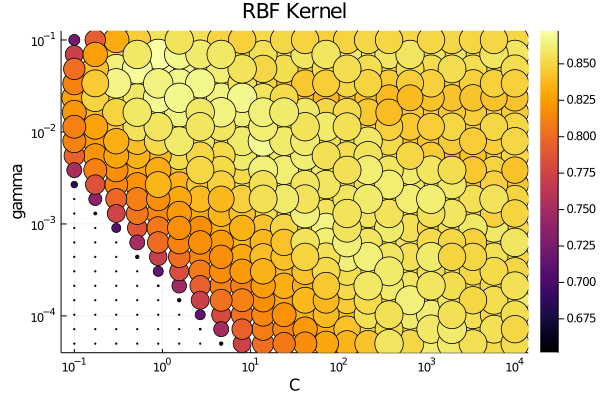

In [139]:
plot(self_tuning_svm_mach, title="RBF Kernel")

In [140]:
fitted_params(self_tuning_svm_mach).best_model

SVMClassifier(
    C = 0.8961505019466046,
    kernel = "rbf",
    degree = 3,
    gamma = 0.04848598143817531,
    coef0 = 0.0,
    shrinking = true,
    tol = 0.001,
    cache_size = 2000,
    max_iter = -1,
    decision_function_shape = "ovr",
    random_state = nothing) @510

In [158]:
r1 = range(Float64, :C, lower=10^-0.75, upper=10^1, scale=:log10)
r2 = range(Float64, :gamma, lower=10^-2.5, upper=10^-1, scale=:log10)

MLJBase.NumericRange(Float64, :gamma, ... )

In [159]:
svm_rbf_model = SVMClassifier(kernel="rbf", cache_size=1000)
self_tuning_svm_model = TunedModel(model=svm_rbf_model,
                                    tuning=Grid(goal=500),
                                    resampling=CV(nfolds=5), 
                                    measure=accuracy,
                                    acceleration=CPUThreads(),
                                    range=[r1,r2])

DeterministicTunedModel(
    model = SVMClassifier(
            C = 1.0,
            kernel = "rbf",
            degree = 3,
            gamma = "auto",
            coef0 = 0.0,
            shrinking = true,
            tol = 0.001,
            cache_size = 1000,
            max_iter = -1,
            decision_function_shape = "ovr",
            random_state = nothing),
    tuning = Grid(
            goal = 500,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = CV(
            nfolds = 5,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = accuracy(),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{Float64,MLJBase.Bounded,Symbol}[NumericRange{Float64,…} @384, NumericRange{Float64,…} @587],
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPUThreads{Int64}(1),
    acceleration_resampling = CPU1{Nothing}(nothing),
 

In [160]:
self_tuning_svm_mach = machine(self_tuning_svm_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=DeterministicTunedModel{Grid,…} @783`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{DeterministicTunedModel{Grid,…}} @950 trained 0 times.
  args: 
    1:	Source @167 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @139 ⏎ `AbstractArray{Multiclass{2},1}`


In [161]:
z = fit!(self_tuning_svm_mach, rows=train)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…}} @950.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 484 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{CV,…} @899`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @692`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} wher

Evaluating over 484 metamodels:   3%[>                        ]  ETA: 0:00:37┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @943`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:   4%[>                        ]  ETA: 0:00:37┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @067`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:   4%[>                        ]  ETA: 0:00:36┌ Warning

Evaluating over 484 metamodels:   7%[=>                       ]  ETA: 0:00:36┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @616`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:   7%[=>                       ]  ETA: 0:00:36┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @347`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:   7%[=>                       ]  ETA: 0:00:36┌ Warning

Evaluating over 484 metamodels:  10%[==>                      ]  ETA: 0:00:34┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @622`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  11%[==>                      ]  ETA: 0:00:34┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @888`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  11%[==>                      ]  ETA: 0:00:34┌ Warning

Evaluating over 484 metamodels:  14%[===>                     ]  ETA: 0:00:32┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @271`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  14%[===>                     ]  ETA: 0:00:32┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @262`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  14%[===>                     ]  ETA: 0:00:32┌ Warning

Evaluating over 484 metamodels:  17%[====>                    ]  ETA: 0:00:31┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @623`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  18%[====>                    ]  ETA: 0:00:31┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @730`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  18%[====>                    ]  ETA: 0:00:31┌ Warning

Evaluating over 484 metamodels:  21%[=====>                   ]  ETA: 0:00:30┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @413`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  21%[=====>                   ]  ETA: 0:00:29┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @699`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  21%[=====>                   ]  ETA: 0:00:29┌ Warning

Evaluating over 484 metamodels:  24%[======>                  ]  ETA: 0:00:28┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @088`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  25%[======>                  ]  ETA: 0:00:28┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @705`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  25%[======>                  ]  ETA: 0:00:28┌ Warning

Evaluating over 484 metamodels:  28%[======>                  ]  ETA: 0:00:27┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @242`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  28%[=======>                 ]  ETA: 0:00:27┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @426`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  28%[=======>                 ]  ETA: 0:00:27┌ Warning

Evaluating over 484 metamodels:  31%[=======>                 ]  ETA: 0:00:26┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @330`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  32%[=======>                 ]  ETA: 0:00:26┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @675`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  32%[=======>                 ]  ETA: 0:00:25┌ Warning

Evaluating over 484 metamodels:  35%[========>                ]  ETA: 0:00:24┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @930`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  35%[========>                ]  ETA: 0:00:24┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @683`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  35%[========>                ]  ETA: 0:00:24┌ Warning

Evaluating over 484 metamodels:  38%[=========>               ]  ETA: 0:00:23┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @680`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  39%[=========>               ]  ETA: 0:00:23┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @127`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  39%[=========>               ]  ETA: 0:00:23┌ Warning

Evaluating over 484 metamodels:  42%[==========>              ]  ETA: 0:00:22┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @186`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  42%[==========>              ]  ETA: 0:00:22┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @070`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  42%[==========>              ]  ETA: 0:00:22┌ Warning

Evaluating over 484 metamodels:  45%[===========>             ]  ETA: 0:00:20┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @937`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  46%[===========>             ]  ETA: 0:00:20┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @182`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  46%[===========>             ]  ETA: 0:00:20┌ Warning

Evaluating over 484 metamodels:  49%[============>            ]  ETA: 0:00:19┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @249`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  49%[============>            ]  ETA: 0:00:19┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @135`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  49%[============>            ]  ETA: 0:00:19┌ Warning

Evaluating over 484 metamodels:  52%[=============>           ]  ETA: 0:00:18┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @279`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  53%[=============>           ]  ETA: 0:00:18┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @809`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  53%[=============>           ]  ETA: 0:00:18┌ Warning

Evaluating over 484 metamodels:  56%[=============>           ]  ETA: 0:00:17┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @160`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  56%[==============>          ]  ETA: 0:00:17┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @150`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  56%[==============>          ]  ETA: 0:00:16┌ Warning

Evaluating over 484 metamodels:  60%[==============>          ]  ETA: 0:00:15┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @265`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  60%[==============>          ]  ETA: 0:00:15┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @383`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  60%[==============>          ]  ETA: 0:00:15┌ Warning

Evaluating over 484 metamodels:  63%[===============>         ]  ETA: 0:00:14┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @935`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  63%[===============>         ]  ETA: 0:00:14┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @463`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  63%[===============>         ]  ETA: 0:00:14┌ Warning

Evaluating over 484 metamodels:  67%[================>        ]  ETA: 0:00:13┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @816`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  67%[================>        ]  ETA: 0:00:13┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @110`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  67%[================>        ]  ETA: 0:00:12┌ Warning

Evaluating over 484 metamodels:  70%[=================>       ]  ETA: 0:00:11┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @469`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  70%[=================>       ]  ETA: 0:00:11┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @212`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  70%[=================>       ]  ETA: 0:00:11┌ Warning

Evaluating over 484 metamodels:  74%[==================>      ]  ETA: 0:00:10┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @914`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  74%[==================>      ]  ETA: 0:00:10┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @817`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  74%[==================>      ]  ETA: 0:00:10┌ Warning

Evaluating over 484 metamodels:  77%[===================>     ]  ETA: 0:00:09┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @086`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  77%[===================>     ]  ETA: 0:00:09┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @660`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  77%[===================>     ]  ETA: 0:00:09┌ Warning

Evaluating over 484 metamodels:  81%[====================>    ]  ETA: 0:00:07┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @283`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  81%[====================>    ]  ETA: 0:00:07┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @395`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  81%[====================>    ]  ETA: 0:00:07┌ Warning

Evaluating over 484 metamodels:  84%[=====================>   ]  ETA: 0:00:06┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @368`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  84%[=====================>   ]  ETA: 0:00:06┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @622`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  85%[=====================>   ]  ETA: 0:00:06┌ Warning

Evaluating over 484 metamodels:  88%[=====================>   ]  ETA: 0:00:05┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @261`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  88%[=====================>   ]  ETA: 0:00:05┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @238`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  88%[======================>  ]  ETA: 0:00:05┌ Warning

Evaluating over 484 metamodels:  91%[======================>  ]  ETA: 0:00:03┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @691`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  91%[======================>  ]  ETA: 0:00:03┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @433`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  92%[======================>  ]  ETA: 0:00:03┌ Warning

Evaluating over 484 metamodels:  95%[=======================> ]  ETA: 0:00:02┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @379`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  95%[=======================> ]  ETA: 0:00:02┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @854`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  95%[=======================> ]  ETA: 0:00:02┌ Warning

Evaluating over 484 metamodels:  98%[========================>]  ETA: 0:00:01┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @066`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  98%[========================>]  ETA: 0:00:01┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @027`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 484 metamodels:  99%[========================>]  ETA: 0:00:01┌ Warning

Machine{DeterministicTunedModel{Grid,…}} @950 trained 1 time.
  args: 
    1:	Source @167 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @139 ⏎ `AbstractArray{Multiclass{2},1}`


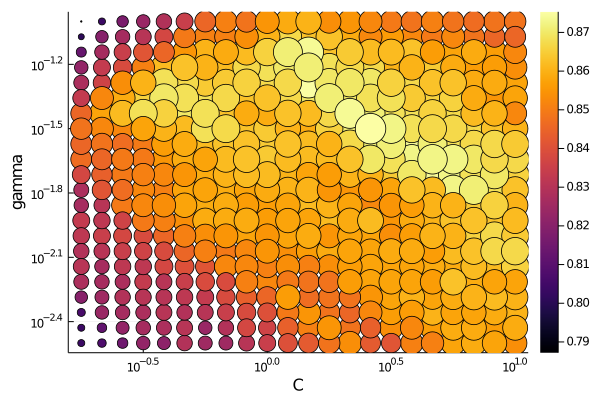

In [169]:
plot(self_tuning_svm_mach)

In [170]:
fn = "Figures/SVM_RBF_MCC"
png(replace(fn,'.' => ','))

In [163]:
best_rbf = fitted_params(self_tuning_svm_mach)
best_rbf

(best_model = SVMClassifier @580,
 best_fitted_params = (support = Int32[3, 4, 7, 9, 10, 17, 23, 24, 25, 27  …  683, 692, 693, 698, 704, 705, 711, 712, 724, 733],
                       support_vectors = [-0.16704045016491958 -0.8113734426124307 … 0.0 0.0; 2.2402486900285115 -1.7224751793235695 … 0.0 12.0; … ; -0.22183458840908007 0.6674026980392109 … 0.0 0.0; 0.006474320941586662 -0.24020083261279573 … 0.0 0.0],
                       n_support = Int32[220, 131],
                       dual_coef = [-1.8993968262975922 -0.15083064908192154 … 2.610157215682537 2.610157215682537],
                       coef = nothing,
                       intercept = [-0.8409440428951928],
                       fit_status = 0,
                       classes = UInt32[0x00000001, 0x00000002],),)

In [164]:
best_rbf.best_model

SVMClassifier(
    C = 2.610157215682537,
    kernel = "rbf",
    degree = 3,
    gamma = 0.03162277660168379,
    coef0 = 0.0,
    shrinking = true,
    tol = 0.001,
    cache_size = 1000,
    max_iter = -1,
    decision_function_shape = "ovr",
    random_state = nothing) @580

In [165]:
best_loss = round(z.report.best_result.measurement[1],digits=5)

0.87533

In [ ]:
# fn = "Figures/LearningCurve_DT_merge_purity_thresh:$(best_mpt)_loss:$(best_loss)"
# png(replace(fn,'.' => ','))

##### More fitting

In [166]:
best_rbf_model = SVMClassifier(kernel="rbf", C=best_rbf.best_model.C, gamma=best_rbf.best_model.gamma)
svm_mach = machine(best_rbf_model, X_stand, y)
fit!(svm_mach, rows=train, verbosity=2)
svm_acc = evaluate!(svm_mach, resampling=CV(shuffle=true), measure=[accuracy], 
                        verbosity=1)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{SVMClassifier} @271.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure │ _.measurement │ _.per_fold                                 │
├───────────┼───────────────┼────────────────────────────────────────────┤
│ accuracy  │ 0.871         │ [0.847, 0.864, 0.858, 0.875, 0.875, 0.909] │
└───────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


##### Learning Curves

In [167]:
data_schedule, training_losses, valid_losses = learn_curve(best_rbf_model, X_stand[train,:], y[train])

(d, train_metric, valid_metric) = (10, 1.0, 0.7635135135135135)
(d, train_metric, valid_metric) = (15, 1.0, 0.7567567567567568)
(d, train_metric, valid_metric) = (20, 1.0, 0.7297297297297297)
(d, train_metric, valid_metric) = (25, 1.0, 0.7432432432432432)
(d, train_metric, valid_metric) = (30, 1.0, 0.7702702702702703)
(d, train_metric, valid_metric) = (35, 1.0, 0.7702702702702703)
(d, train_metric, valid_metric) = (40, 1.0, 0.8040540540540541)
(d, train_metric, valid_metric) = (45, 1.0, 0.7905405405405406)
(d, train_metric, valid_metric) = (50, 1.0, 0.7905405405405406)
(d, train_metric, valid_metric) = (55, 1.0, 0.777027027027027)
(d, train_metric, valid_metric) = (60, 1.0, 0.7905405405405406)
(d, train_metric, valid_metric) = (65, 1.0, 0.8175675675675675)
(d, train_metric, valid_metric) = (70, 1.0, 0.8243243243243243)
(d, train_metric, valid_metric) = (75, 0.9866666666666667, 0.8310810810810811)
(d, train_metric, valid_metric) = (80, 0.975, 0.8175675675675675)
(d, train_metric, valid_

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (105, 0.9619047619047619, 0.8310810810810811)
(d, train_metric, valid_metric) = (110, 0.9545454545454546, 0.8243243243243243)
(d, train_metric, valid_metric) = (115, 0.9652173913043478, 0.8243243243243243)
(d, train_metric, valid_metric) = (120, 0.9666666666666667, 0.8243243243243243)
(d, train_metric, valid_metric) = (125, 0.96, 0.8040540540540541)
(d, train_metric, valid_metric) = (130, 0.9692307692307692, 0.8040540540540541)
(d, train_metric, valid_metric) = (135, 0.9703703703703703, 0.8175675675675675)
(d, train_metric, valid_metric) = (140, 0.9714285714285714, 0.8175675675675675)
(d, train_metric, valid_metric) = (145, 0.9724137931034482, 0.8243243243243243)
(d, train_metric, valid_metric) = (150, 0.9733333333333334, 0.8175675675675675)
(d, train_metric, valid_metric) = (155, 0.9741935483870968, 0.8243243243243243)
(d, train_metric, valid_metric) = (160, 0.975, 0.8243243243243243)
(d, train_metric, valid_metric) = (165, 0.9636363636363636, 0.83783

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (215, 0.9627906976744186, 0.8716216216216216)
(d, train_metric, valid_metric) = (220, 0.9590909090909091, 0.8716216216216216)
(d, train_metric, valid_metric) = (225, 0.96, 0.8648648648648649)
(d, train_metric, valid_metric) = (230, 0.9608695652173913, 0.8648648648648649)
(d, train_metric, valid_metric) = (235, 0.9659574468085106, 0.8581081081081081)
(d, train_metric, valid_metric) = (240, 0.95, 0.8445945945945946)
(d, train_metric, valid_metric) = (245, 0.9510204081632653, 0.8445945945945946)
(d, train_metric, valid_metric) = (250, 0.956, 0.8513513513513513)
(d, train_metric, valid_metric) = (255, 0.9607843137254902, 0.8445945945945946)
(d, train_metric, valid_metric) = (260, 0.9576923076923077, 0.8378378378378378)
(d, train_metric, valid_metric) = (265, 0.9547169811320755, 0.8378378378378378)
(d, train_metric, valid_metric) = (270, 0.9555555555555556, 0.8445945945945946)
(d, train_metric, valid_metric) = (275, 0.9527272727272728, 0.8581081081081081)
(

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (290, 0.9517241379310345, 0.8513513513513513)
(d, train_metric, valid_metric) = (295, 0.9525423728813559, 0.8513513513513513)
(d, train_metric, valid_metric) = (300, 0.95, 0.8378378378378378)
(d, train_metric, valid_metric) = (305, 0.9540983606557377, 0.8378378378378378)
(d, train_metric, valid_metric) = (310, 0.9580645161290322, 0.8378378378378378)
(d, train_metric, valid_metric) = (315, 0.9555555555555556, 0.8378378378378378)
(d, train_metric, valid_metric) = (320, 0.95625, 0.8378378378378378)
(d, train_metric, valid_metric) = (325, 0.9538461538461538, 0.8378378378378378)
(d, train_metric, valid_metric) = (330, 0.9575757575757575, 0.8445945945945946)
(d, train_metric, valid_metric) = (335, 0.9552238805970149, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (340, 0.9558823529411765, 0.8648648648648649)
(d, train_metric, valid_metric) = (345, 0.9565217391304348, 0.8716216216216216)
(d, train_metric, valid_metric) = (350, 0.9542857142857143, 0.8716216216216216)
(d, train_metric, valid_metric) = (355, 0.9549295774647887, 0.8648648648648649)
(d, train_metric, valid_metric) = (360, 0.9527777777777777, 0.8581081081081081)
(d, train_metric, valid_metric) = (365, 0.9534246575342465, 0.8513513513513513)
(d, train_metric, valid_metric) = (370, 0.9513513513513514, 0.8513513513513513)
(d, train_metric, valid_metric) = (375, 0.9546666666666667, 0.8513513513513513)
(d, train_metric, valid_metric) = (380, 0.9526315789473684, 0.8581081081081081)
(d, train_metric, valid_metric) = (385, 0.9532467532467532, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (390, 0.958974358974359, 0.8513513513513513)
(d, train_metric, valid_metric) = (395, 0.9569620253164557, 0.8513513513513513)
(d, train_metric, valid_metric) = (400, 0.9575, 0.8513513513513513)
(d, train_metric, valid_metric) = (405, 0.9530864197530864, 0.8581081081081081)
(d, train_metric, valid_metric) = (410, 0.9536585365853658, 0.8581081081081081)
(d, train_metric, valid_metric) = (415, 0.9542168674698795, 0.8581081081081081)
(d, train_metric, valid_metric) = (420, 0.9571428571428572, 0.8581081081081081)
(d, train_metric, valid_metric) = (425, 0.96, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (430, 0.9627906976744186, 0.8581081081081081)
(d, train_metric, valid_metric) = (435, 0.9632183908045977, 0.8581081081081081)
(d, train_metric, valid_metric) = (440, 0.9613636363636364, 0.8581081081081081)
(d, train_metric, valid_metric) = (445, 0.9617977528089887, 0.8581081081081081)
(d, train_metric, valid_metric) = (450, 0.96, 0.8581081081081081)
(d, train_metric, valid_metric) = (455, 0.9604395604395605, 0.8581081081081081)
(d, train_metric, valid_metric) = (460, 0.9586956521739131, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (465, 0.9591397849462365, 0.8648648648648649)
(d, train_metric, valid_metric) = (470, 0.9595744680851064, 0.8648648648648649)
(d, train_metric, valid_metric) = (475, 0.9578947368421052, 0.8648648648648649)
(d, train_metric, valid_metric) = (480, 0.9583333333333334, 0.8648648648648649)
(d, train_metric, valid_metric) = (485, 0.9567010309278351, 0.8648648648648649)
(d, train_metric, valid_metric) = (490, 0.9571428571428572, 0.8716216216216216)
(d, train_metric, valid_metric) = (495, 0.9575757575757575, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (500, 0.954, 0.8716216216216216)
(d, train_metric, valid_metric) = (505, 0.9544554455445544, 0.8716216216216216)
(d, train_metric, valid_metric) = (510, 0.9549019607843138, 0.8851351351351351)
(d, train_metric, valid_metric) = (515, 0.9533980582524272, 0.8851351351351351)
(d, train_metric, valid_metric) = (520, 0.9557692307692308, 0.8851351351351351)
(d, train_metric, valid_metric) = (525, 0.9561904761904761, 0.8851351351351351)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (530, 0.9566037735849057, 0.8851351351351351)
(d, train_metric, valid_metric) = (535, 0.9532710280373832, 0.8783783783783784)
(d, train_metric, valid_metric) = (540, 0.9537037037037037, 0.8783783783783784)
(d, train_metric, valid_metric) = (545, 0.9577981651376146, 0.8783783783783784)
(d, train_metric, valid_metric) = (550, 0.9581818181818181, 0.8783783783783784)
(d, train_metric, valid_metric) = (555, 0.9585585585585585, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (560, 0.9589285714285715, 0.8783783783783784)
(d, train_metric, valid_metric) = (565, 0.95929203539823, 0.8851351351351351)
(d, train_metric, valid_metric) = (570, 0.9578947368421052, 0.8716216216216216)
(d, train_metric, valid_metric) = (575, 0.9582608695652174, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (580, 0.9568965517241379, 0.8783783783783784)
(d, train_metric, valid_metric) = (585, 0.9555555555555556, 0.8783783783783784)
(d, train_metric, valid_metric) = (590, 0.9542372881355932, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @644`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(10:5:590, Any[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.9577981651376146, 0.9581818181818181, 0.9585585585585585, 0.9589285714285715, 0.95929203539823, 0.9578947368421052, 0.9582608695652174, 0.9568965517241379, 0.9555555555555556, 0.9542372881355932], Any[0.7635135135135135, 0.7567567567567568, 0.7297297297297297, 0.7432432432432432, 0.7702702702702703, 0.7702702702702703, 0.8040540540540541, 0.7905405405405406, 0.7905405405405406, 0.777027027027027  …  0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8851351351351351, 0.8716216216216216, 0.8716216216216216, 0.8783783783783784, 0.8783783783783784, 0.8716216216216216])

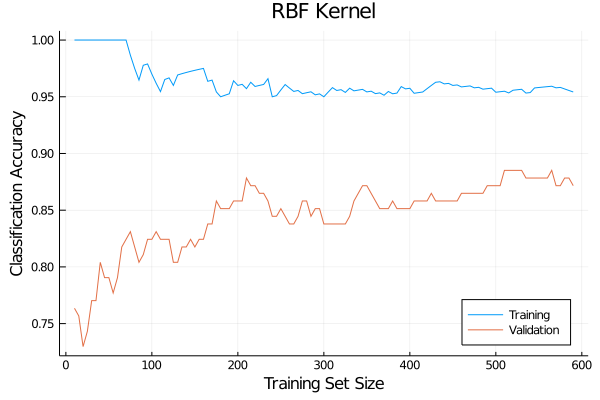

In [171]:
plot(data_schedule, training_losses, label="Training", legend=:bottomright)
plot!(data_schedule, valid_losses, label="Validation")
ylabel!("Classification Accuracy")
xlabel!("Training Set Size")
title!("RBF Kernel")

In [180]:
fn = "Figures/SVM_RBF_LC"
png(replace(fn,'.' => ','))

#### Final Results

RBF SVM

In [173]:
final_svm_rbf = best_rbf.best_model

SVMClassifier(
    C = 2.610157215682537,
    kernel = "rbf",
    degree = 3,
    gamma = 0.03162277660168379,
    coef0 = 0.0,
    shrinking = true,
    tol = 0.001,
    cache_size = 1000,
    max_iter = -1,
    decision_function_shape = "ovr",
    random_state = nothing) @580

In [175]:
Final_SVM = machine(final_svm_rbf, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @580`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{SVMClassifier} @315 trained 0 times.
  args: 
    1:	Source @908 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @981 ⏎ `AbstractArray{Multiclass{2},1}`


In [176]:
fit!(Final_SVM, rows=train, verbosity=2)

┌ Info: Training Machine{SVMClassifier} @315.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{SVMClassifier} @315 trained 1 time.
  args: 
    1:	Source @908 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @981 ⏎ `AbstractArray{Multiclass{2},1}`


In [177]:
ŷ2 = MLJ.predict(Final_SVM, X_stand[test,:]);

In [178]:
accuracy(ŷ2, y[test])

0.8769716088328076

In [193]:
c2 = confusion_matrix(ŷ2, y[test])

┌ Warning: The classes are un-ordered,
│ using: negative='NRB' and positive='RB'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/measures/confusion_matrix.jl:83


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │     NRB     │     RB      │
├─────────────┼─────────────┼─────────────┤
│     NRB     │     199     │     21      │
├─────────────┼─────────────┼─────────────┤
│     RB      │     18      │     79      │
└─────────────┴─────────────┴─────────────┘


In [194]:
precision(c2)

0.8144329896907216

In [195]:
recall(c2)

0.79

In [196]:
18/(18+199)

0.08294930875576037

In [197]:
21/(21+79)

0.21